* SimpleRNN
* DeepRNN


# **SimpleRNN**

## **Sentiment Analysis**

There are two techniques
* Interger encoded
* Word Embedding

## **Uderstanding the IMDB data**

In [ ]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), _ = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Encoded review (first 20 words):", x_train[0][:20])
print("Label:", y_train[0])

Encoded review (first 20 words): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Label: 1


In [ ]:
# word index mapping

word_index = imdb.get_word_index()

print("Number of words in dictionary:", len(word_index))
print("Some examples:", list(word_index.items())[:10])

Number of words in dictionary: 88584
Some examples: [('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]


In [ ]:
word_index = {k: (v+3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = {v: k for k, v in word_index.items()}

In [ ]:
def decode_review(encoded_review):
  return " ".join([reverse_word_index.get(i, '?') for i in encoded_review])

print("Decoded review:\n")
print(decode_review(x_train[10][:50]))

Decoded review:

<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and switchblade romance bursting on to the scene maléfique preceded the revival just slightly but stands head and shoulders over most modern horror titles and is surely one


## **Using RNN for sentiment analysis**

In [ ]:
# importing libraries

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
# loading the data

vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print("First review (encoded):", x_train[0][:10])
print("First label:", y_train[0])

First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
First label: 1


In [ ]:
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (25000,)
X test shape: (25000,)
y train shape: (25000,)
y test shape: (25000,)


In [ ]:
print(type(x_train))
print(x_train.shape)
print(type(x_train[0]))
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_train[2]))

<class 'numpy.ndarray'>
(25000,)
<class 'list'>
218
189
141


In [ ]:
# padding sequences

maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print("Padded review shape:", x_train.shape)

print("\n")
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)
print(x_train[1].shape)
print(x_train[2].shape)

Padded review shape: (25000, 200)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200,)
(200,)
(200,)


In [ ]:
# reshaping the data

x_train_rnn = np.expand_dims(x_train, -1)
x_test_rnn = np.expand_dims(x_test, -1)

print("New shape:", x_train_rnn.shape)

New shape: (25000, 200, 1)


In [ ]:
# building a RNN model
import keras

model = Sequential([
    keras.Input(shape=(maxlen, 1)),
    SimpleRNN(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model training

history = model.fit(
    x_train_rnn, y_train,
    epochs = 10,
    batch_size = 64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.5002 - loss: 0.6934 - val_accuracy: 0.5034 - val_loss: 0.6958
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.5081 - loss: 0.6935 - val_accuracy: 0.5073 - val_loss: 0.6943
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5109 - loss: 0.6935 - val_accuracy: 0.5040 - val_loss: 0.6938
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.5062 - val_loss: 0.6935
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.5081 - loss: 0.6924 - val_accuracy: 0.5062 - val_loss: 0.6927
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5089 - loss: 0.6927 - val_accuracy: 0.5096 - val_loss: 0.6932
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5109 - loss: 0.6931 - val_accuracy: 0.5091 - val_loss: 0.6939
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.4975 - loss: 0.6943 - 

To get a Better accuracy, the input words should be embeded, means **Word embeddings** should be applied

**Prediction**

In [ ]:
# For a random test point

index = 10
sample_review = x_test_rnn[index].reshape(1, maxlen, 1)
true_label = y_test[index]


# predict
pred = model.predict(sample_review)[0][0]
pred_label = int(pred > 0.5)

print("Predicted probability:", round(pred, 4))
print("Predicted sentiment:", pred_label)
print("True sentiment:", true_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted probability: 0.5355
Predicted sentiment: 1
True sentiment: 1


In [ ]:
from json import encoder
# for a random text

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

def encode_text(text):
  tokens = text.lower().split()
  encoded = [1]
  for word in tokens:
    encoded.append(word_index.get(word, 2))
  return encoded

text1 = "This movie was very good"
text2 = "This movie was bad"

encoded = encode_text(text1)
padded = pad_sequences([encoded], maxlen=200, padding='post')
encoded2 = encode_text(text2)
padded2 = pad_sequences([encoded2], maxlen=200, padding='post')

padded_rnn = np.expand_dims(padded, -1)
padded_rnn2 = np.expand_dims(padded2, -1)


pred = model.predict(padded_rnn)[0][0]
pred2 = model.predict(padded_rnn2)[0][0]



print("Review is:", text1)
print("Predited Review:", round(pred, 4))
print("Sentiment:", "Positive" if pred>0.5 else "Negative")

print("\nReview is:", text2)
print("Predited Review:", round(pred2, 4))
print("Sentiment:", "Positive" if pred2>0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Review is: This movie was very good
Predited Review: 0.5834
Sentiment: Positive

Review is: This movie was bad
Predited Review: 0.6248
Sentiment: Positive


This makes some wrong preditions too

Because embedding technique was not that much efficient

## **Using Word Embeddings**

In [ ]:
# importing libraries

import numpy as np
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
# loading the dataset

vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# model building
embedding_dim = 32

model = Sequential([
    keras.Input(shape=(maxlen,)),
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim),
    SimpleRNN(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.5568 - loss: 1.2736 - val_accuracy: 0.6734 - val_loss: 0.6503
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.7107 - loss: 0.6064 - val_accuracy: 0.7143 - val_loss: 0.5779
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.7626 - loss: 0.5107 - val_accuracy: 0.7276 - val_loss: 0.5531
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.7910 - loss: 0.4671 - val_accuracy: 0.7292 - val_loss: 0.5476
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.8132 - loss: 0.4299 - val_accuracy: 0.7246 - val_loss: 0.5537
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.8235 - loss: 0.4055 - val_accuracy: 0.7221 - val_loss: 0.5605
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.8432 - loss: 0.3823 - val_accuracy: 0.7193 - val_loss: 0.5661


We can observe that the Accuracy score is increased

* We can also observe the overfitting issu
* RNN's are mostly suffer from overfitting issue
* To solve this, there are new architectures like LSTM, GRU...

In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "good movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Review: good movie
Predicted probability: 0.30159625
Sentiment: Negative


In [ ]:
text = "Movie was bad"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Review: Movie was bad
Predicted probability: 0.049129028
Sentiment: Negative


We can observe that the performance of this RNN model is very bad

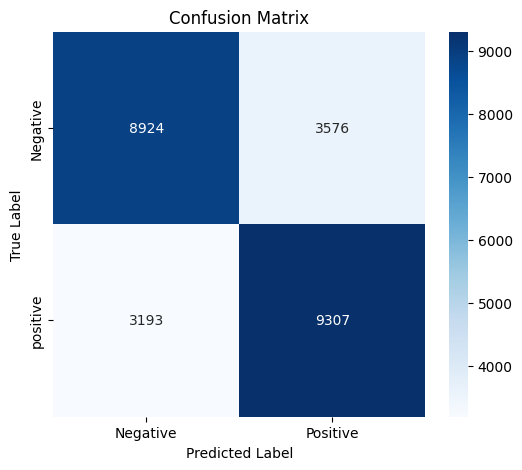

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()